In [ ]:
!pip install yellowbrick  
import numpy as np                       
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

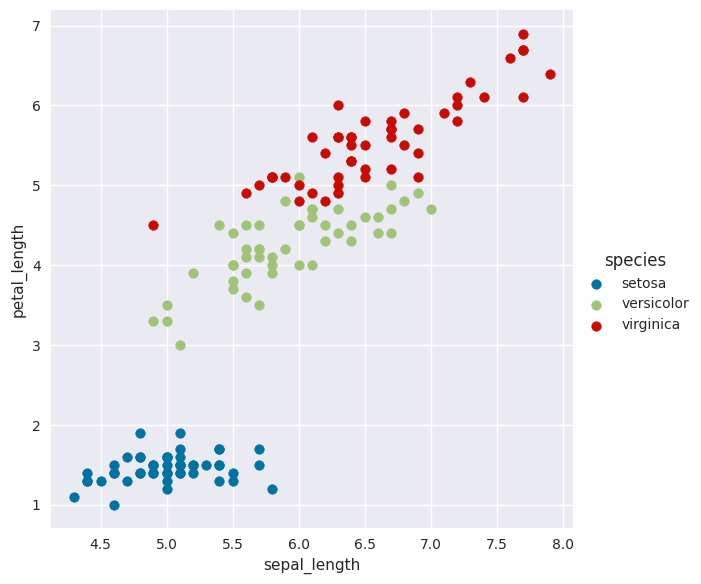

In [ ]:
iris = sns.load_dataset('iris')
sns.set_style("darkgrid")
sns.FacetGrid(iris, hue ="species", height = 6).map(plt.scatter, 'sepal_length', 'petal_length').add_legend();

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


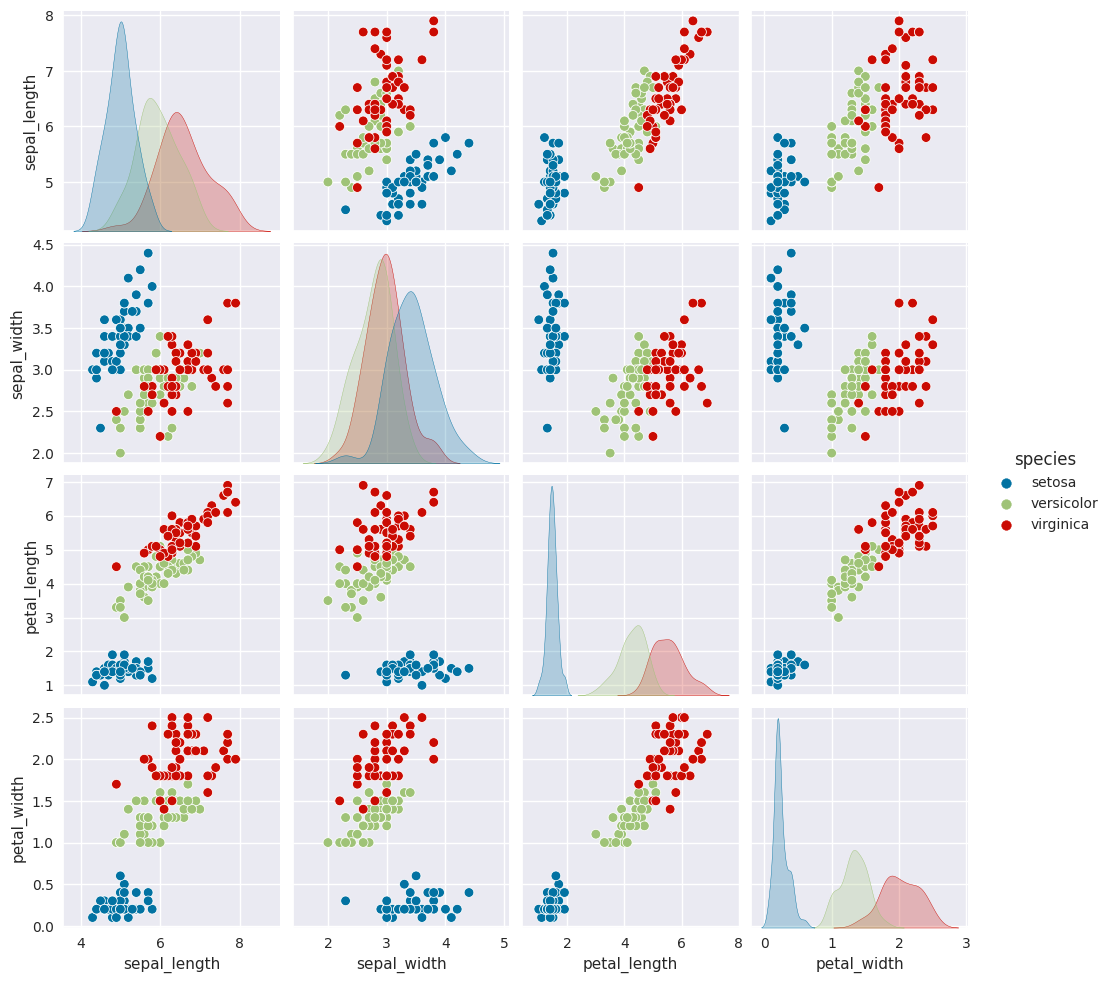

In [ ]:
sns.pairplot(iris, hue="species");

In [ ]:
X = iris.loc[:, iris.columns != 'species']
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pca = PCA(n_components=3)
pca.fit(X)
X_3 = pca.transform(X)

In [ ]:
col = ['PC%s' % _ for _ in range(1, 4)]
iris_3 = pd.DataFrame(X_3, columns=col)
iris_3['species'] = iris['species']
iris_3.head()

,PC1,PC2,PC3,species
0,-0.630703,0.107578,-0.018719,setosa
1,-0.622905,-0.104260,-0.049142,setosa
2,-0.669520,-0.051417,0.019644,setosa
3,-0.654153,-0.102885,0.023219,setosa
4,-0.648788,0.133488,0.015116,setosa


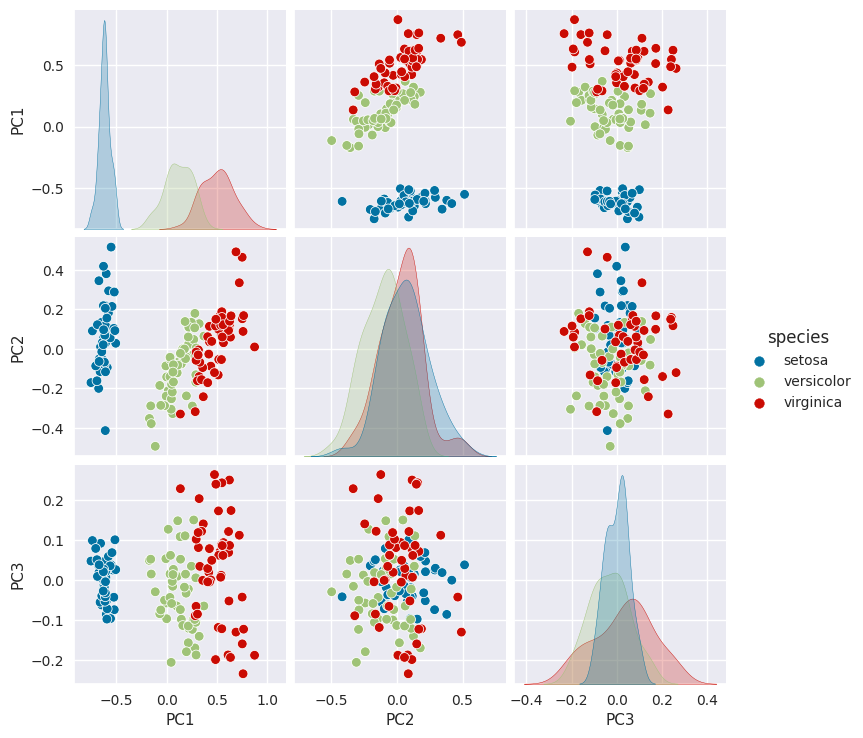

In [ ]:
sns.pairplot(iris_3, hue="species");

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)
iris_km = pd.DataFrame(X_3, columns=col)
iris_km['species'] = kmeans.labels_
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
iris_km['species'] = iris_km['species'].replace({0: "setosa", 1: "virginica", 2: "versicolor"})

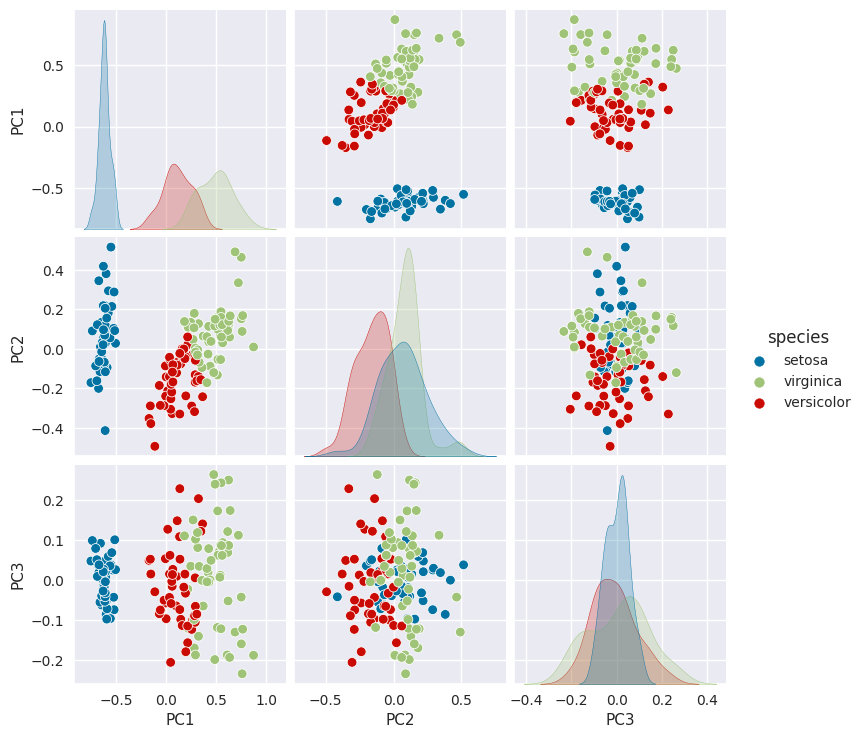

In [ ]:
sns.pairplot(iris_km, hue="species");

In [ ]:
labels_true, labels_pred = iris['species'], iris_km['species']
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels_pred))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels_pred))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels_pred))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels_pred, metric="sqeuclidean"))

Homogeneity: 0.714
Completeness: 0.715
V-measure: 0.714
Adjusted Rand Index: 0.701
Adjusted Mutual Information: 0.711
Silhouette Coefficient: 0.666


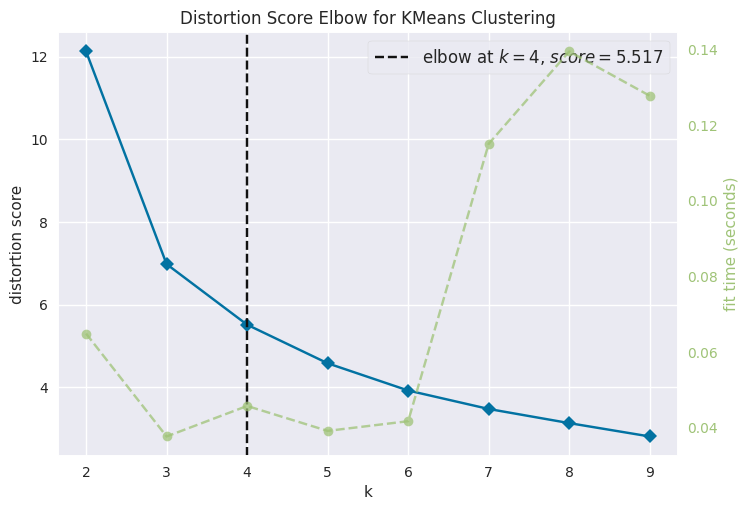

In [ ]:
km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(2, 10))
visualizer.fit(X)
visualizer.show();

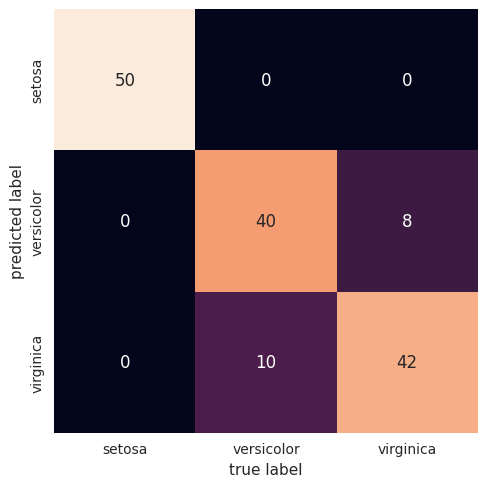

In [ ]:
def show_confusion_matrix(labels_true, labels_pred):
    mat = metrics.confusion_matrix(labels_true, labels_pred)
    target_names = ["setosa", "versicolor", "virginica"]
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
show_confusion_matrix(labels_true, labels_pred)

In [ ]:
af = AffinityPropagation(preference=-3, random_state=0).fit(X)
iris_af = pd.DataFrame(X_3, columns=col)
iris_af['species'] = af.labels_
af.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [ ]:
iris_af['species'] = iris_af['species'].replace({0: "setosa", 1: "versicolor", 2: "virginica"})

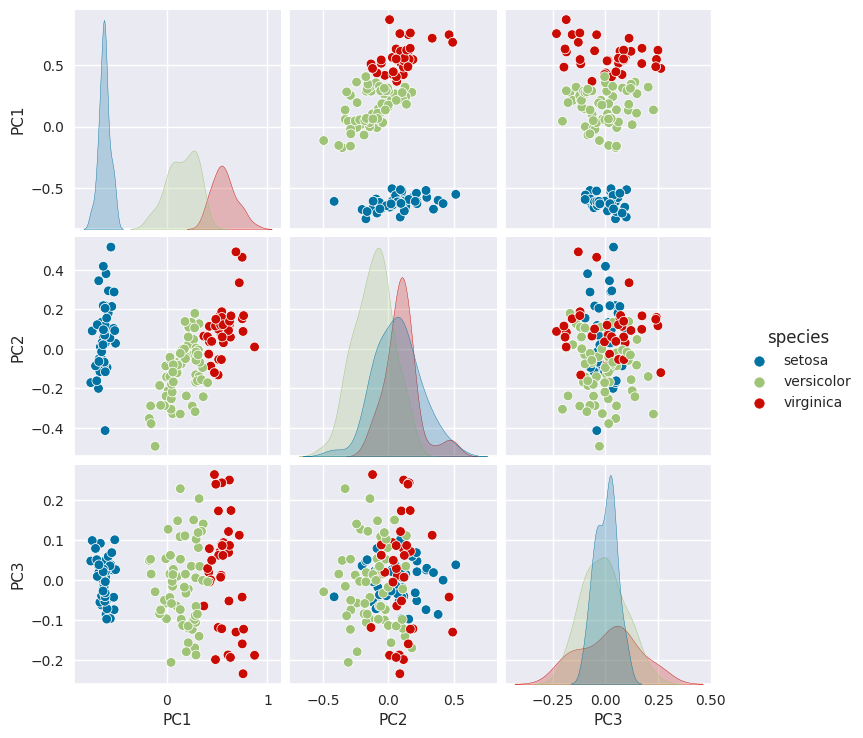

In [ ]:
sns.pairplot(iris_af, hue="species");

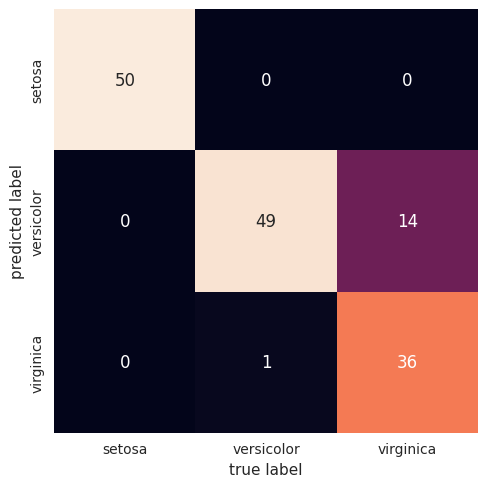

In [ ]:
show_confusion_matrix(iris['species'], iris_af['species'])

In [ ]:
db = DBSCAN(eps=0.3, min_samples=3).fit(X)
db.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
sc = SpectralClustering(n_clusters=3, random_state=0).fit(X)
sc.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

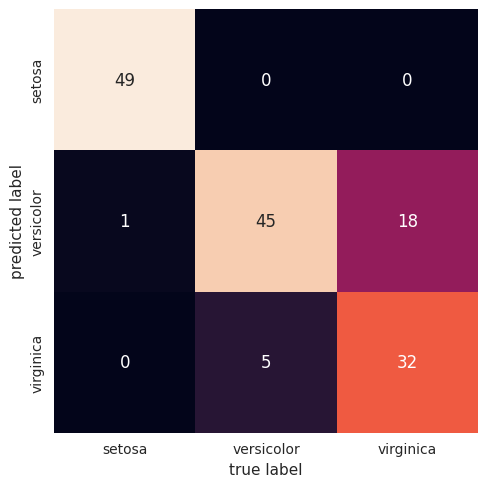

In [ ]:
iris_sc = pd.DataFrame(X_3, columns=col)
iris_sc['species'] = sc.labels_
iris_sc['species'] = iris_sc['species'].replace({0: "setosa", 2: "versicolor", 1: "virginica"})

show_confusion_matrix(iris['species'], iris_sc['species'])

In [ ]:
ac = AgglomerativeClustering(n_clusters=3).fit(X)
ac.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

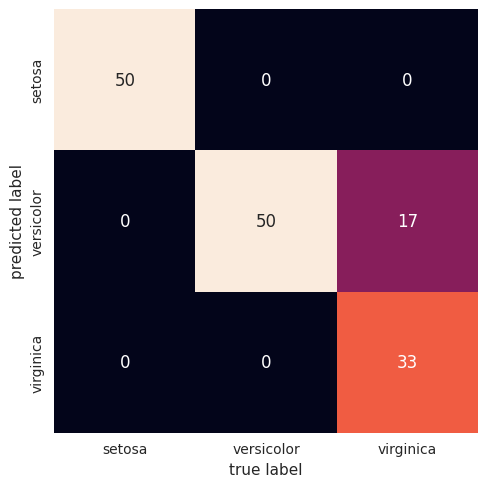

In [ ]:
iris_ac = pd.DataFrame(X_3, columns=col)
iris_ac['species'] = ac.labels_
iris_ac['species'] = iris_ac['species'].replace({1: "setosa", 0: "versicolor", 2: "virginica"})

show_confusion_matrix(iris['species'], iris_ac['species'])

In [ ]:
gm = GaussianMixture(n_components=3, covariance_type='full', random_state=0).fit(X)
gm.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

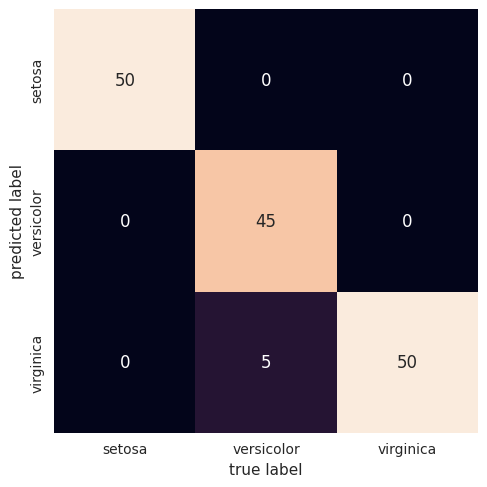

In [ ]:
iris_gm = pd.DataFrame(X_3, columns=col)
iris_gm['species'] = gm.predict(X)
iris_gm['species'] = iris_gm['species'].replace({0: "setosa", 2: "versicolor", 1: "virginica"})

show_confusion_matrix(iris['species'], iris_gm['species'])

In [ ]:
mb = MiniBatchKMeans(n_clusters=3, random_state=0).fit(X)
mb.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

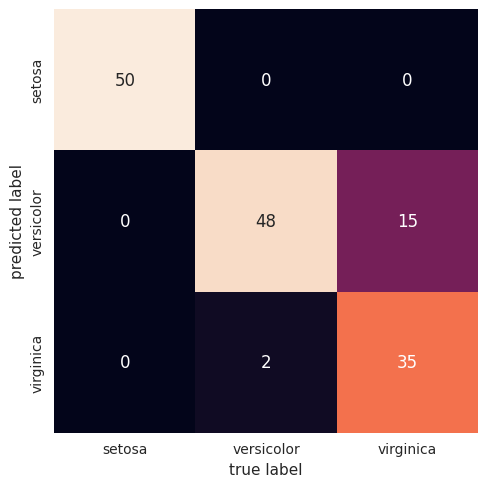

In [ ]:
iris_mb = pd.DataFrame(X_3, columns=col)
iris_mb['species'] = mb.predict(X)
iris_mb['species'] = iris_mb['species'].replace({1: "setosa", 0: "versicolor", 2: "virginica"})

show_confusion_matrix(iris['species'], iris_mb['species'])